# Data Exploration for Diagnostic Breast Cancer

### Importing Necesseties

In [9]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

### Reading data

In [10]:
filename = "wdbc.data"
df = pd.read_csv(filename, header=None)
data = pd.read_csv(filename, header=None)

### Helping function
This function is used give a meaning label to each feature instead of a meaningless index.

In [11]:
def renaming (ind, feature):
    for i in range(10):
        data.rename(columns = {i+ind : feature+names[i]}, inplace = True)
        df.rename(columns = {i+ind : feature+names[i]}, inplace = True)

In [12]:
#renaming the columns
names = ['radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness', 'concavity', 'concave points', 'symmetry', 'fractal dimension']
data.rename(columns = {0 : 'ID' ,1 : 'Diagnosis'}, inplace = True)
df.rename(columns = {0 : 'ID' ,1 : 'Diagnosis'}, inplace = True)
renaming (2, "Mean ")
renaming (12, "SE ")
renaming (22, "Worst ")

# Requirements
Here, We are going to plot 5 different plots to get a good visualization for our data.

## Count Plot

Text(0, 0.5, 'Count')

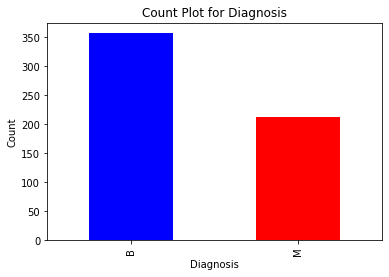

In [13]:
data['Diagnosis'].value_counts().plot(kind='bar', color =['blue', 'red'])
plt.title('Count Plot for Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Count')

It's obvious that the benign tumor has a bigger rate on this data.

### Helping function
This function is used to split the data into two separate gruops (malignant and benign).

In [14]:
def split():
    malignant = data.where(data['Diagnosis']=='M')
    benign = data.where(data['Diagnosis']=='B')
    
    #remove any NaN values
    malignant = malignant.dropna()
    benign = benign.dropna()
    
    return malignant, benign

In [15]:
malignant, benign = split()

# _________
## Histograms
Here we plot histograms for mean, standard error (SE) and worst features grouped by diagnosis. 

Firstly, we plot the 10 features of mean:

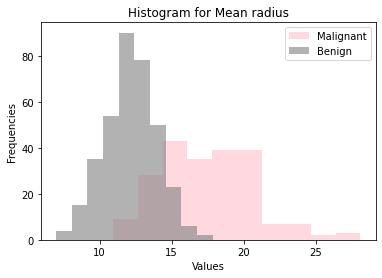

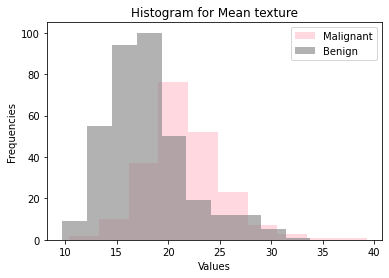

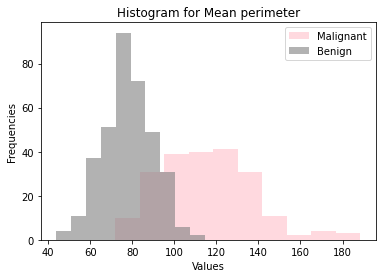

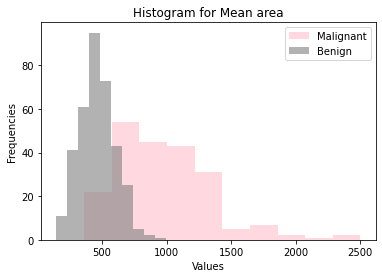

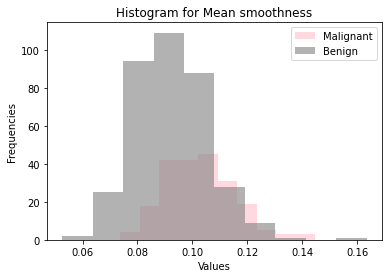

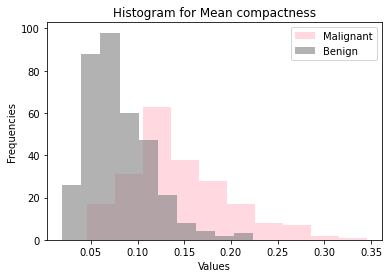

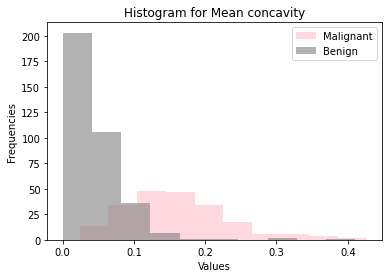

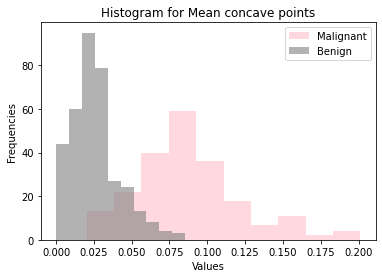

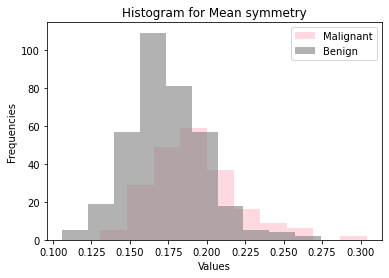

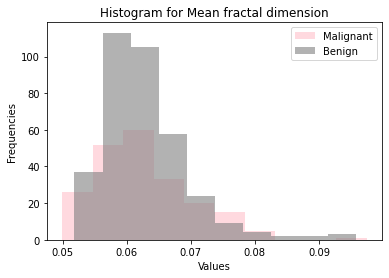

In [16]:
for i in range (10):
    plt.hist(malignant.iloc[:, i+2], bins = 10, label='Malignant',color='pink', alpha = 0.6)
    plt.hist(benign.iloc[:, i+2], bins = 10,  label='Benign', color='gray', alpha = 0.6)
    plt.title('Histogram for Mean '+ names[i])
    plt.legend(loc='upper right')
    plt.xlabel('Values')
    plt.ylabel('Frequencies')
    plt.show()

### Comment
* Maximum frequency (**Mode**) of benign is always greater than maximum frequency of malignant.
* ALL features are unimodal



Secondly, we plot the 10 features of SE:

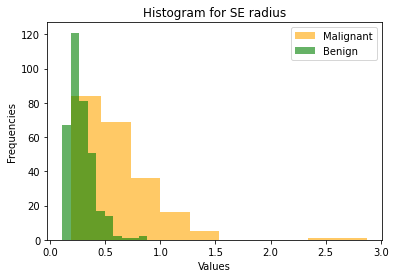

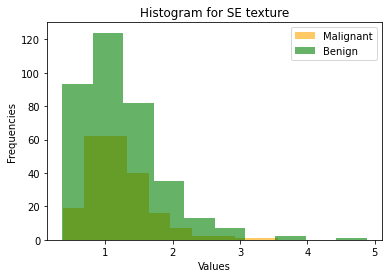

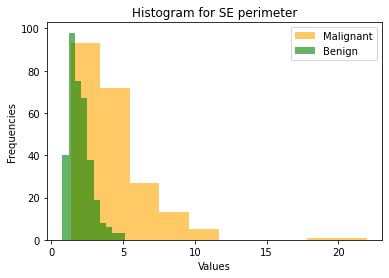

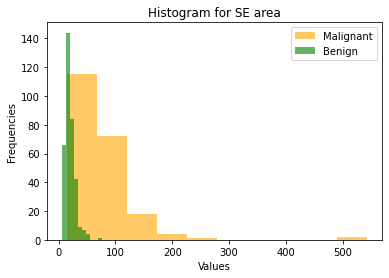

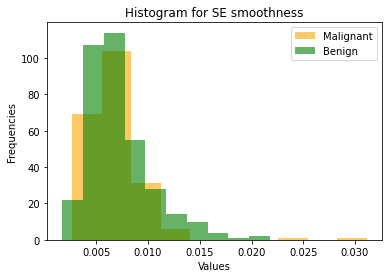

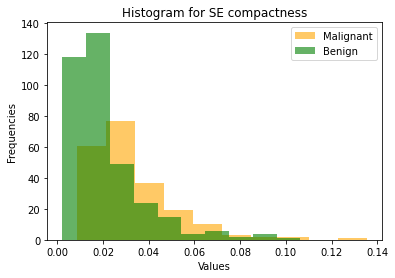

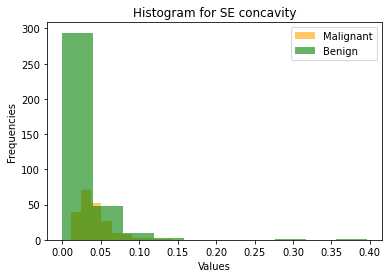

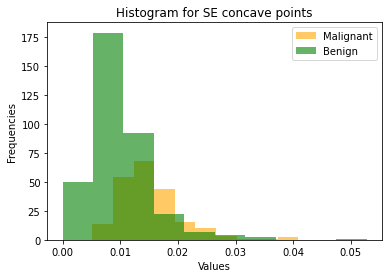

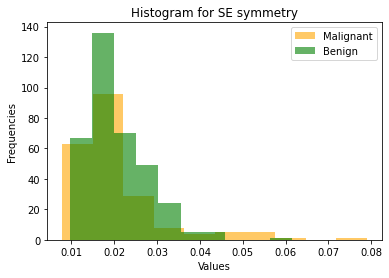

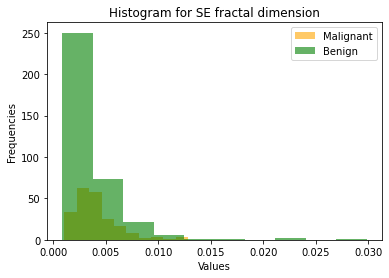

In [17]:
for i in range (10):
    plt.hist(malignant.iloc[:, i+12], bins = 10, label='Malignant', color='orange',alpha = 0.6)
    plt.hist(benign.iloc[:, i+12], bins = 10, label='Benign',color='green', alpha = 0.6)
    plt.title('Histogram for SE '+names[i])
    plt.legend(loc='upper right')
    plt.xlabel('Values')
    plt.ylabel('Frequencies')
    plt.show()

### Comment
* Same observations of Mean features.
* All features are almost right-skewed.

Finally, we plot the 10 plots of the Worst features:

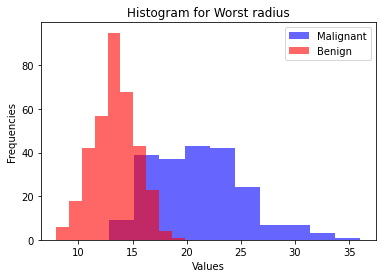

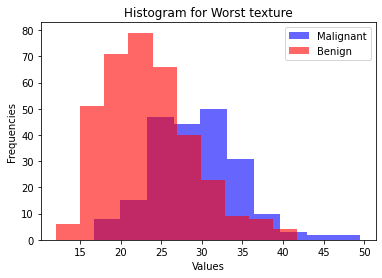

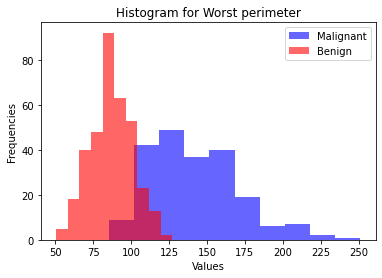

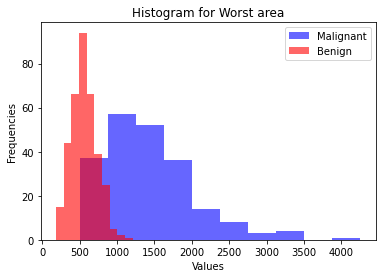

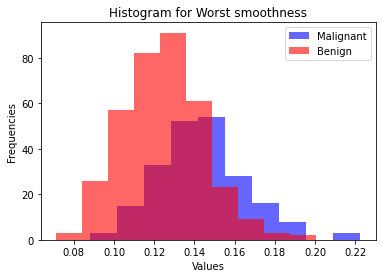

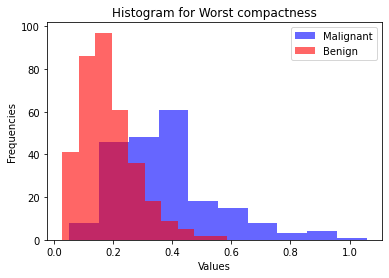

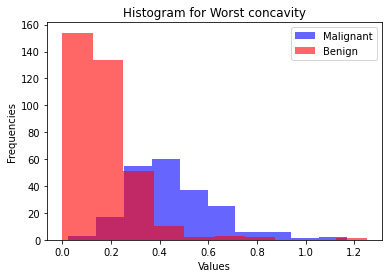

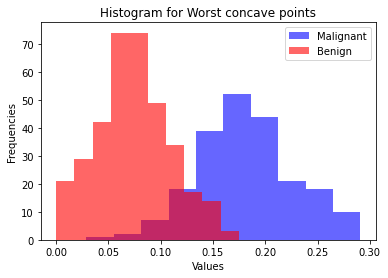

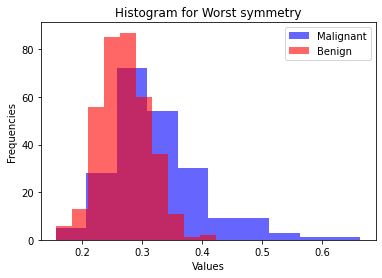

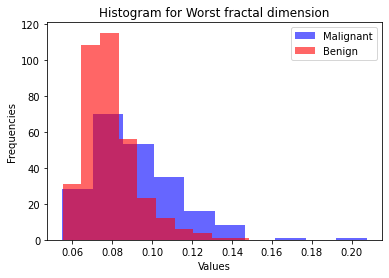

In [18]:
for i in range (10):
    plt.hist(malignant.iloc[:, i+22], bins = 10, label='Malignant', color='blue', alpha = 0.6)
    plt.hist(benign.iloc[:, i+22], bins = 10, label='Benign', color='red', alpha = 0.6)
    plt.title('Histogram for Worst '+names[i])
    plt.legend(loc='upper right')
    plt.xlabel('Values')
    plt.ylabel('Frequencies')
    plt.show()

### Comment
* Worst concave points feature for benign class is bimodal.
* There are some right-skwed features (worst concavity for B) and others are symmetric ones(Worst smoothness for M). 


* Also for small values, benign usually has a greater frequency than malignant and vice versa.

# _________________
## Boxplots

In [19]:
features = data[data.columns[2:32]]  
features = features.apply(zscore)
data[data.columns[2:32]]= features

In [20]:
malignant, benign = split ()

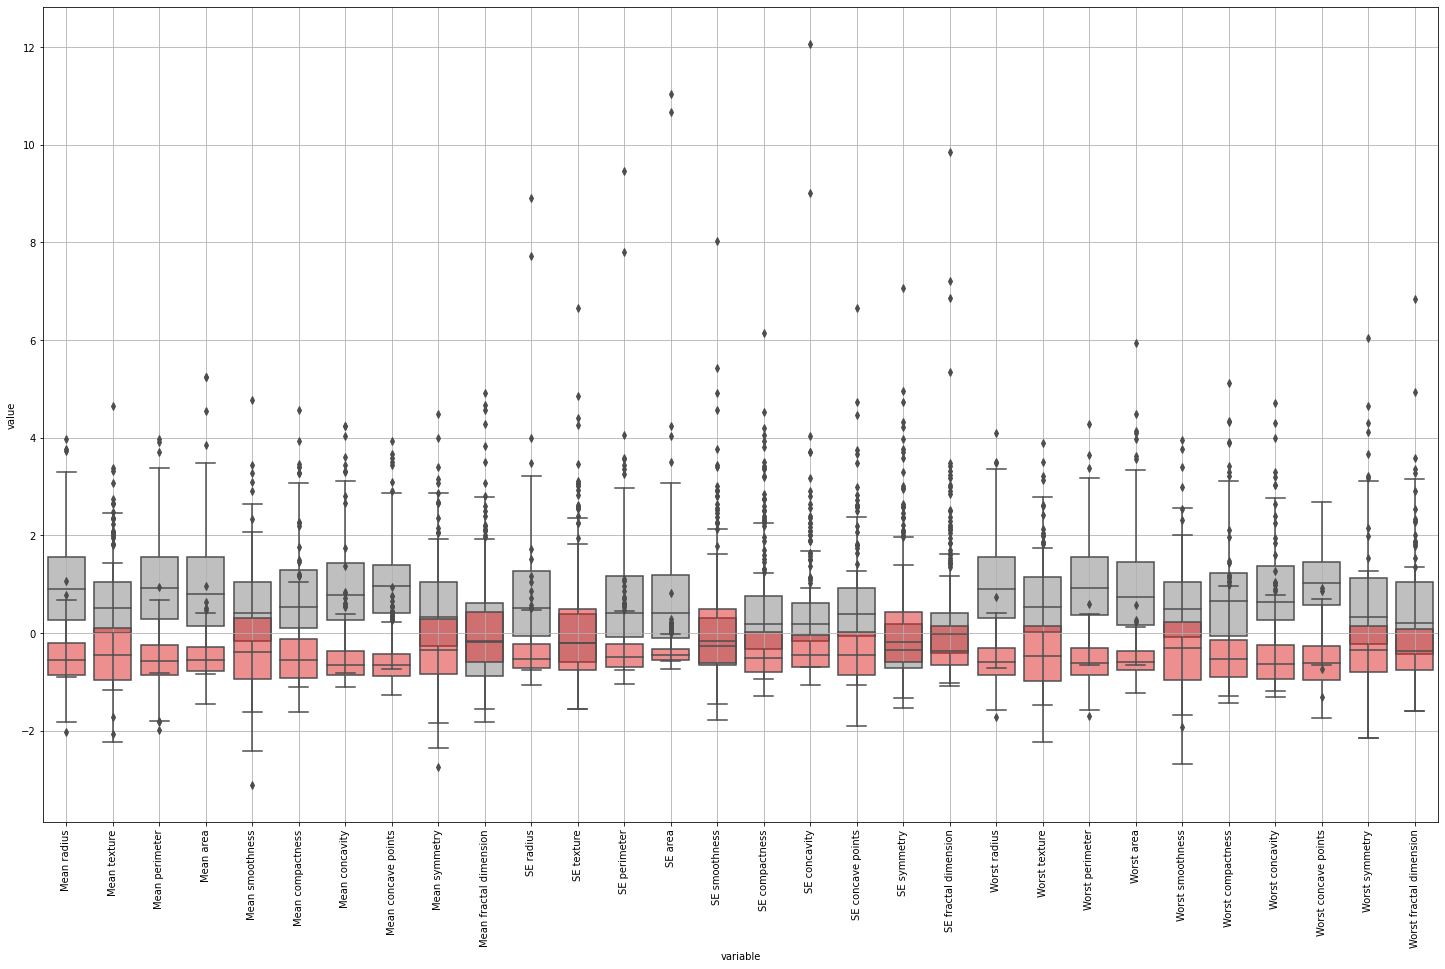

In [21]:
fig = plt.figure(figsize=(25, 15))
m = pd.DataFrame(malignant, columns=features.columns)
b = pd.DataFrame(benign, columns=features.columns)

#gray for malignant and red for benign
ax = sns.boxplot(x="variable", y="value", data=pd.melt(m), color = 'gray')
ax = sns.boxplot(x="variable", y="value", data=pd.melt(b), color = 'red')

for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .5))
plt.xticks(rotation = 90)
plt.grid()
plt.show()

### Comment
Most of the B values are below 0, and most of the M values are above 0.

We can obtain some information from this boxplot, such as:

* Mean area and mean perimeter are highly correlated as their boxes are similar to each other.
* On the other hand, SE symmetry and mean radius are uncorrelated as their boxes are far from to each other.
* Most of benign are symmetric as their median line almost halves the box.
* There are some outliers for each feature. SE compactness has lots of them.



**Discriminative features**
* Mean Radius
* Mean area
* SE radius
* Worst area
* Worst concave points

# _________________
## Scatter Plot Matrix

In [22]:
def plot_scatter(i):
    Scatter_data = pd.DataFrame(df, columns=features.columns[i:i+10])
    Scatter_data['Diagnosis'] = data['Diagnosis']
    plt.figure(figsize=(15, 8))
    sns.pairplot(Scatter_data, hue='Diagnosis') 

<Figure size 1080x576 with 0 Axes>

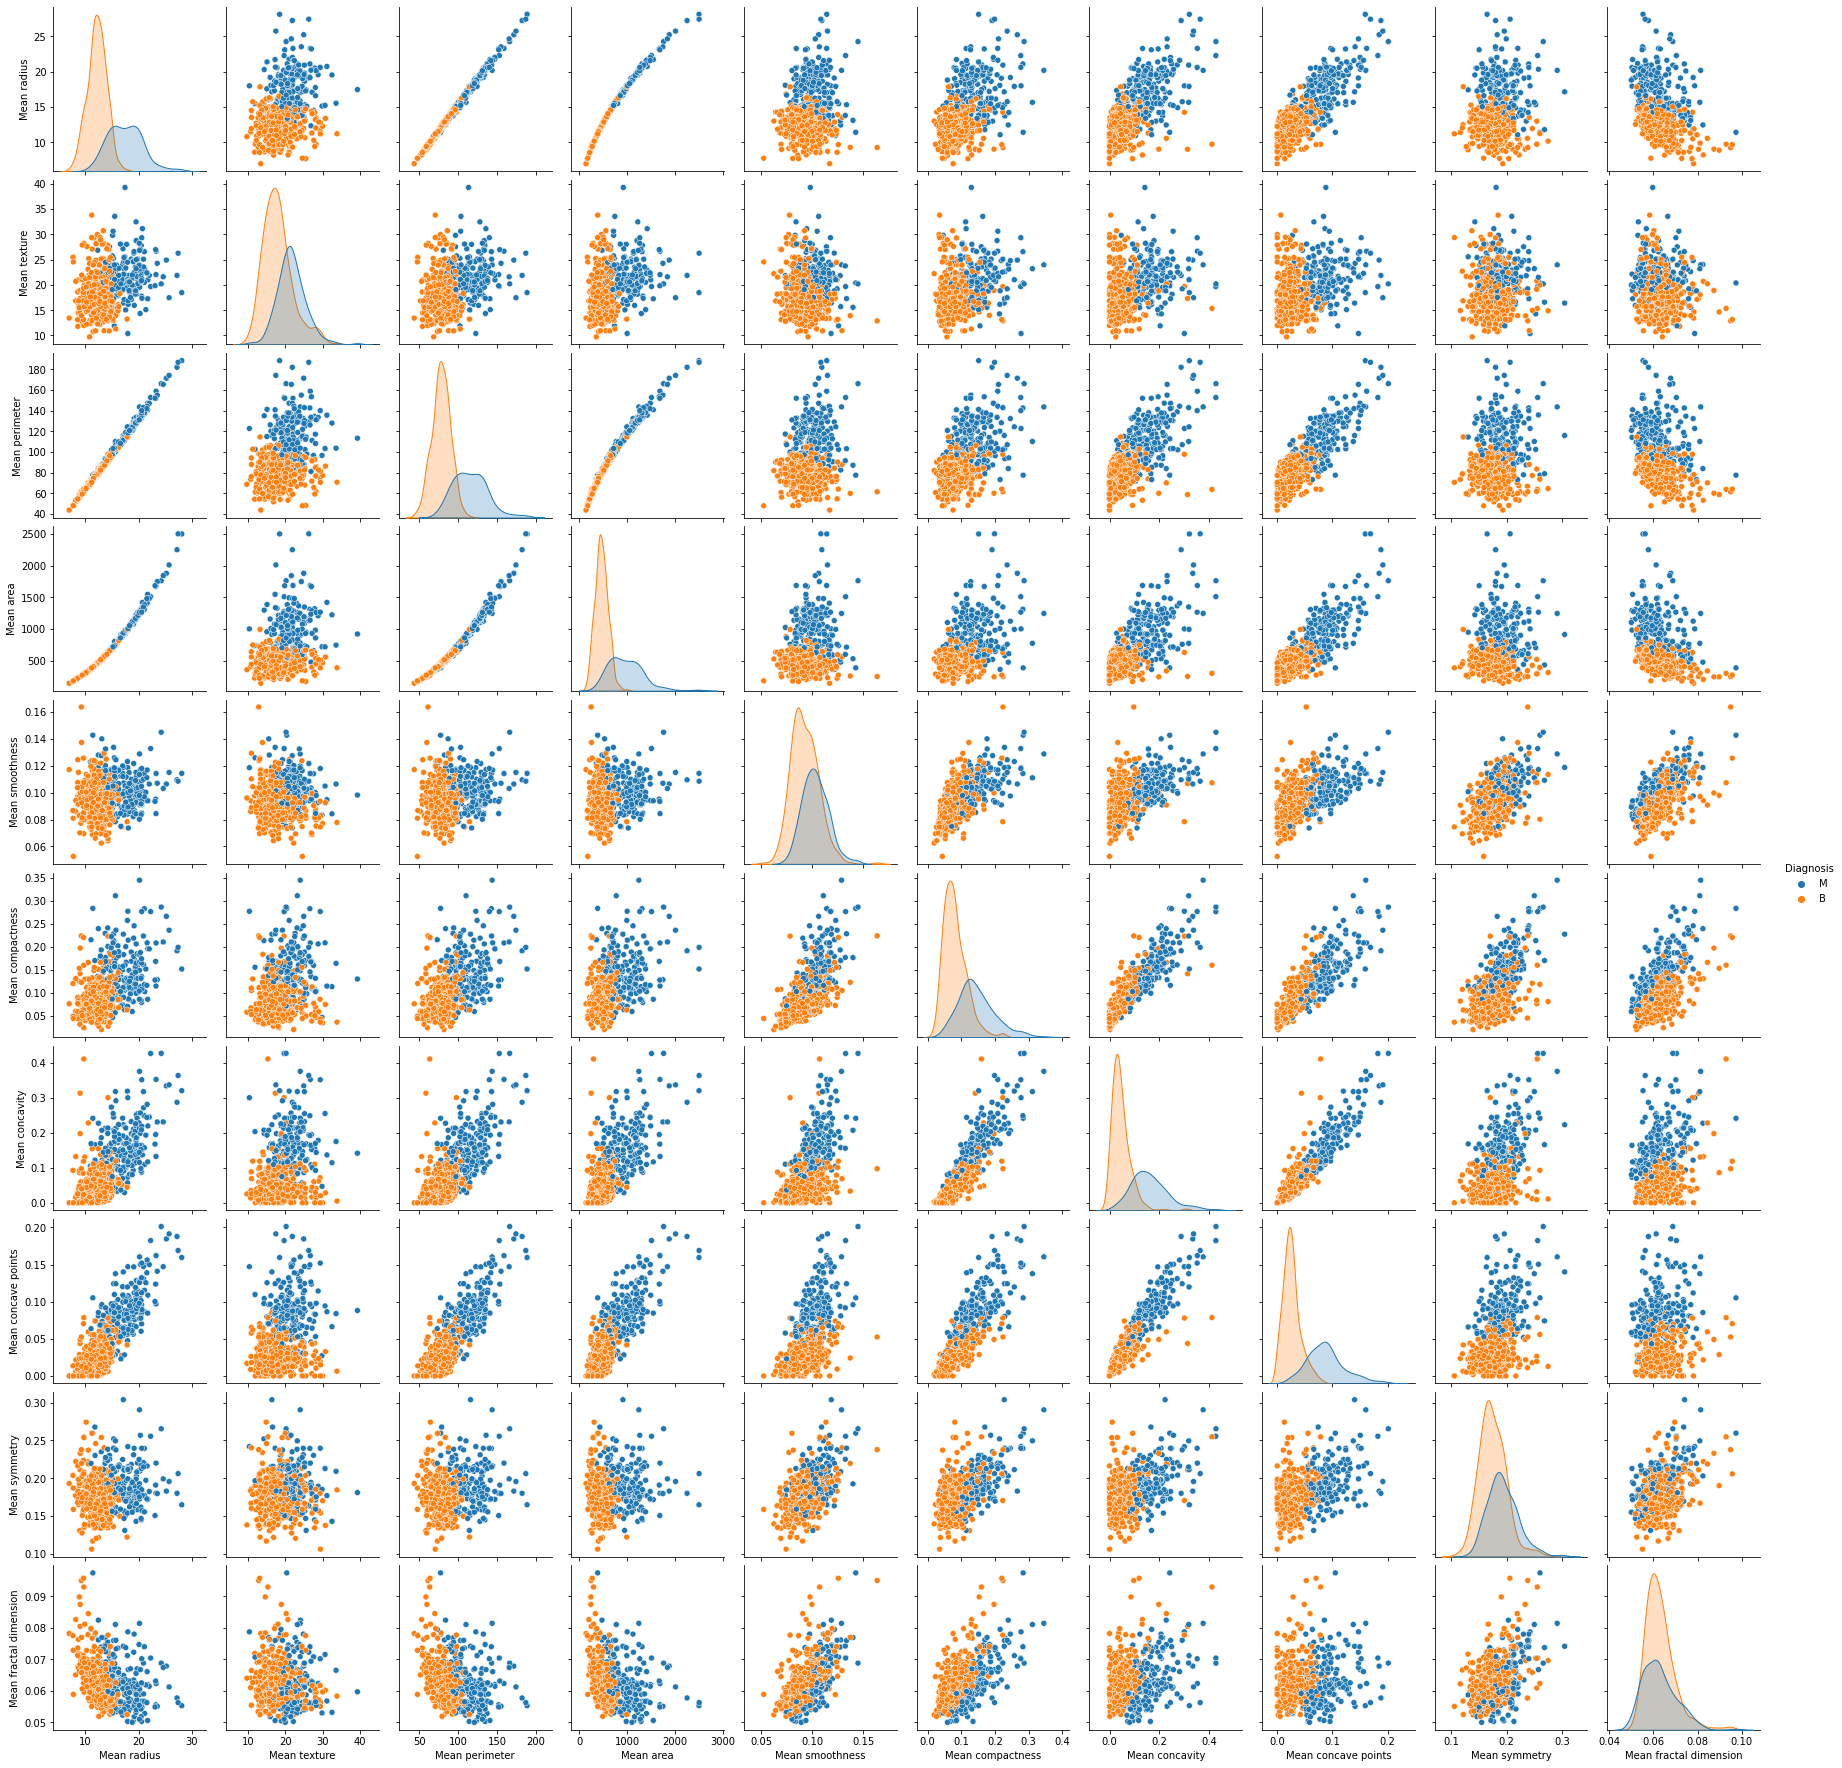

In [23]:
plot_scatter(0)

### Comment
We can observe that there are some **Positively correlated** features, such as:

* mean area with mean radius 
* mean perimeter with mean radius
* mean area with mean perimeter
* mean concavity with mean compactness
* mean concavity with mean concave points
* mean area with mean concave points
* mean perimeter with mean concave points

Also there are some **Discriminative** features, such as:
* Mean concave points
* Mean concavity


<Figure size 1080x576 with 0 Axes>

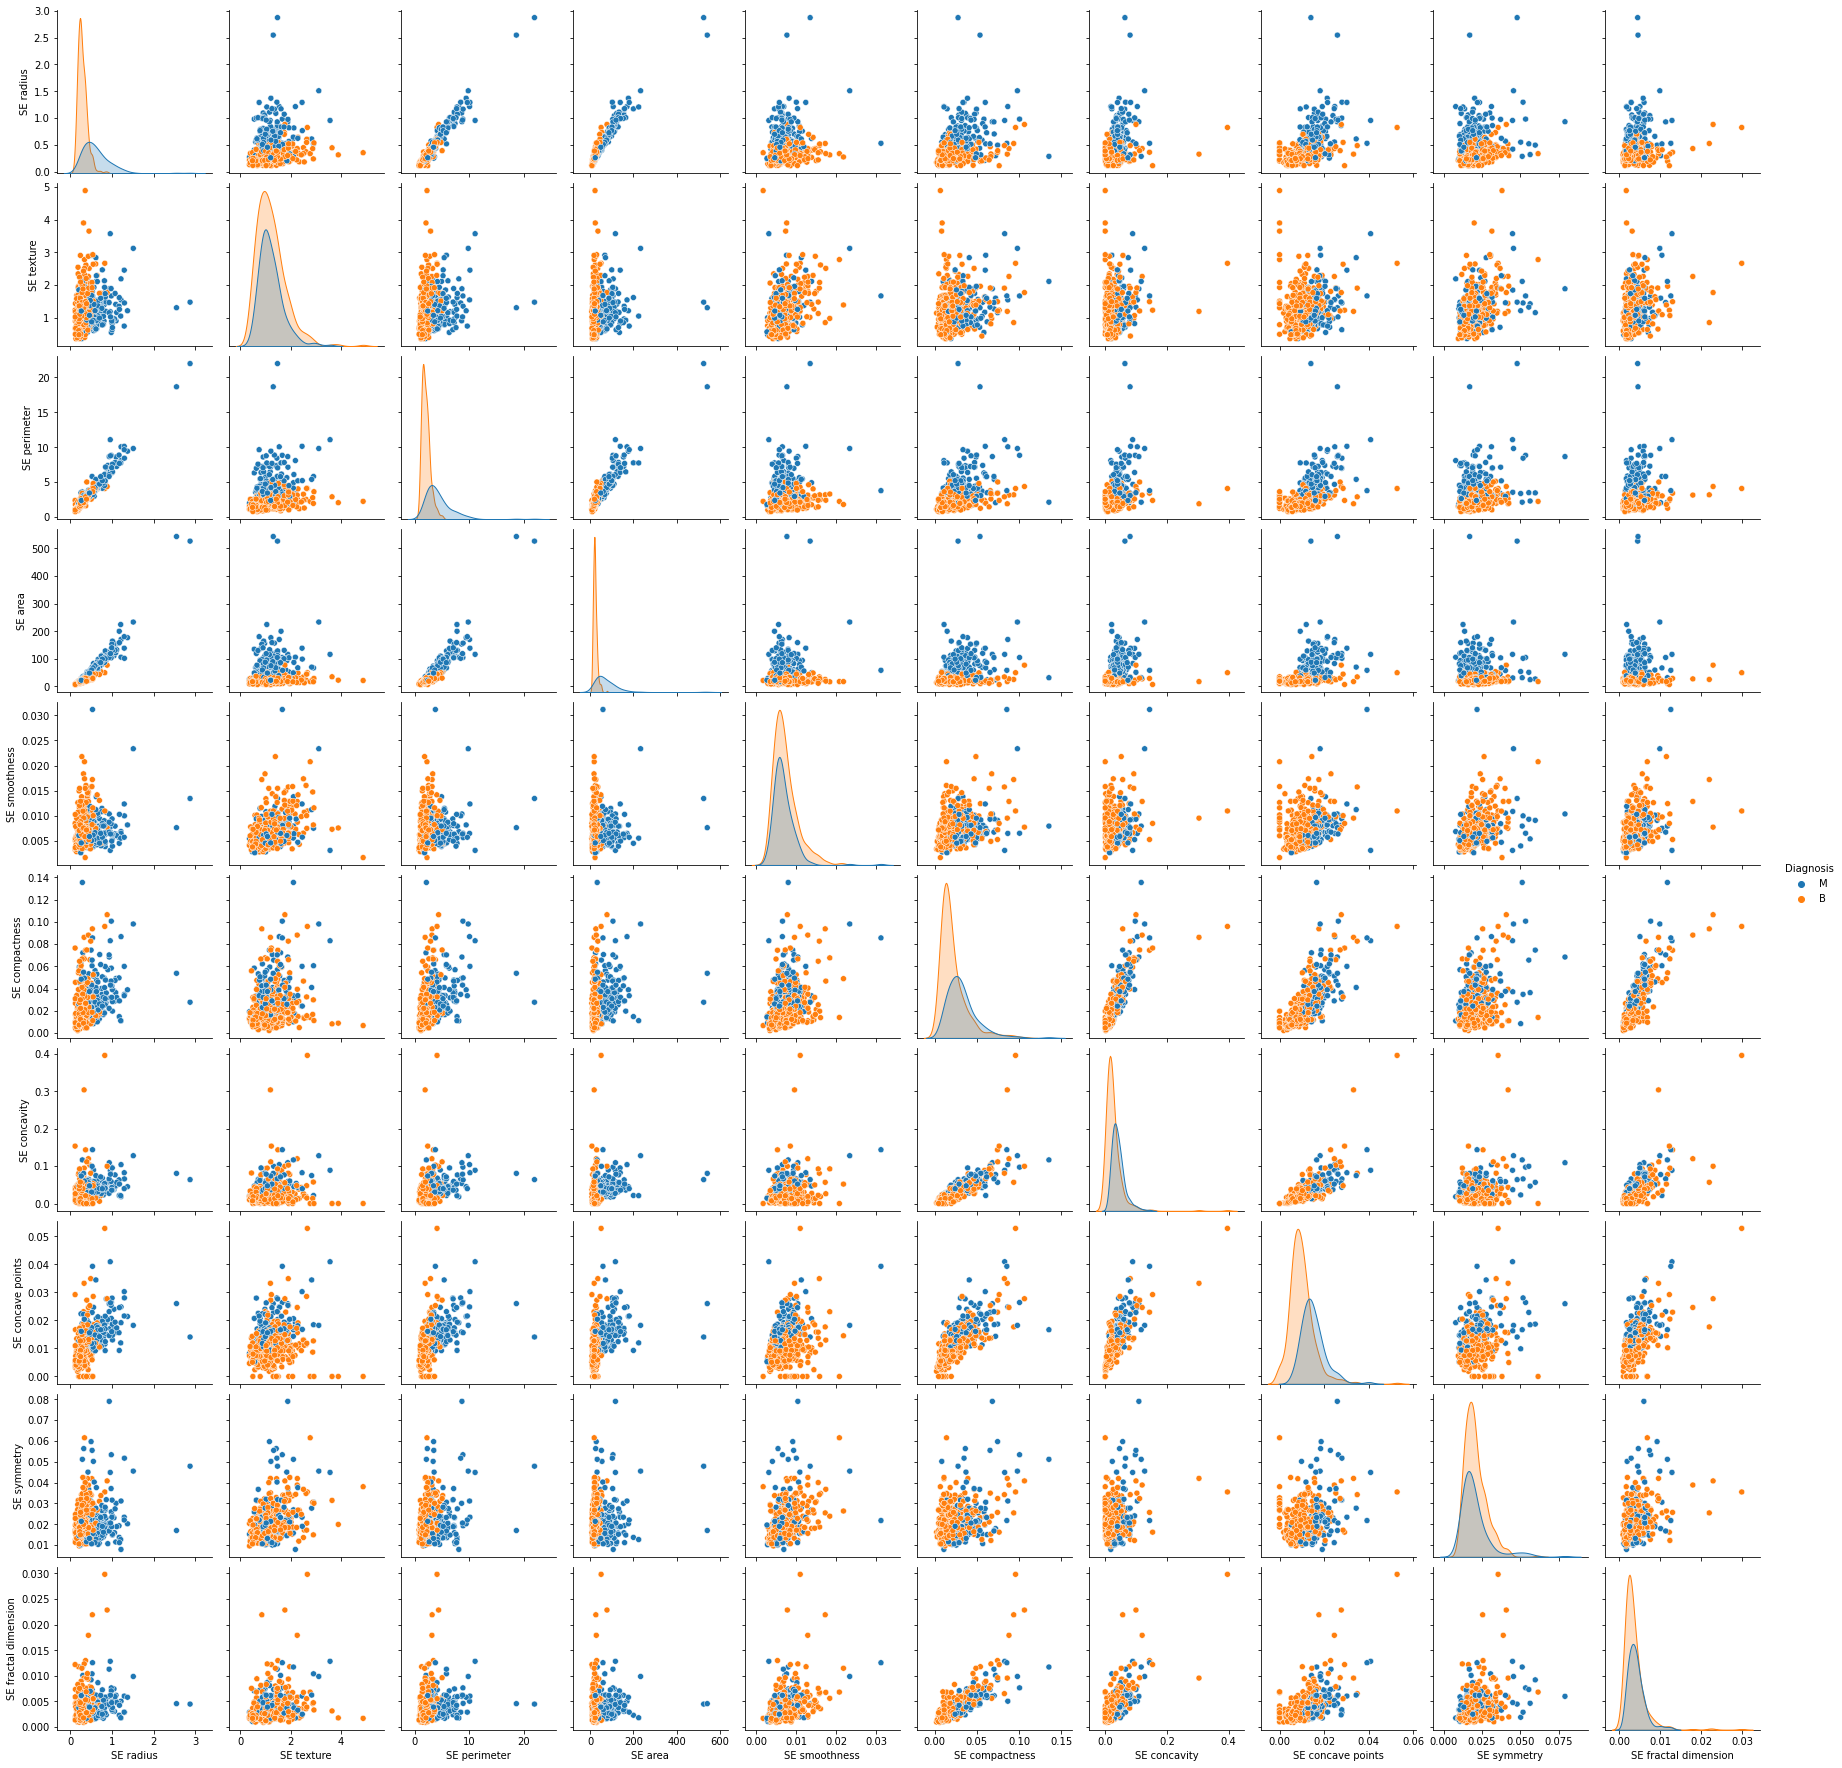

In [43]:
 plot_scatter(10)

### Comment
SE has a similar distribution of the mean. Almost the positively correlated features are the same.

**Observations**
* SE texture can't be used to distinguish between the two diagnosis.
* On the other hand, SE area can be a discriminative features.


<Figure size 1080x576 with 0 Axes>

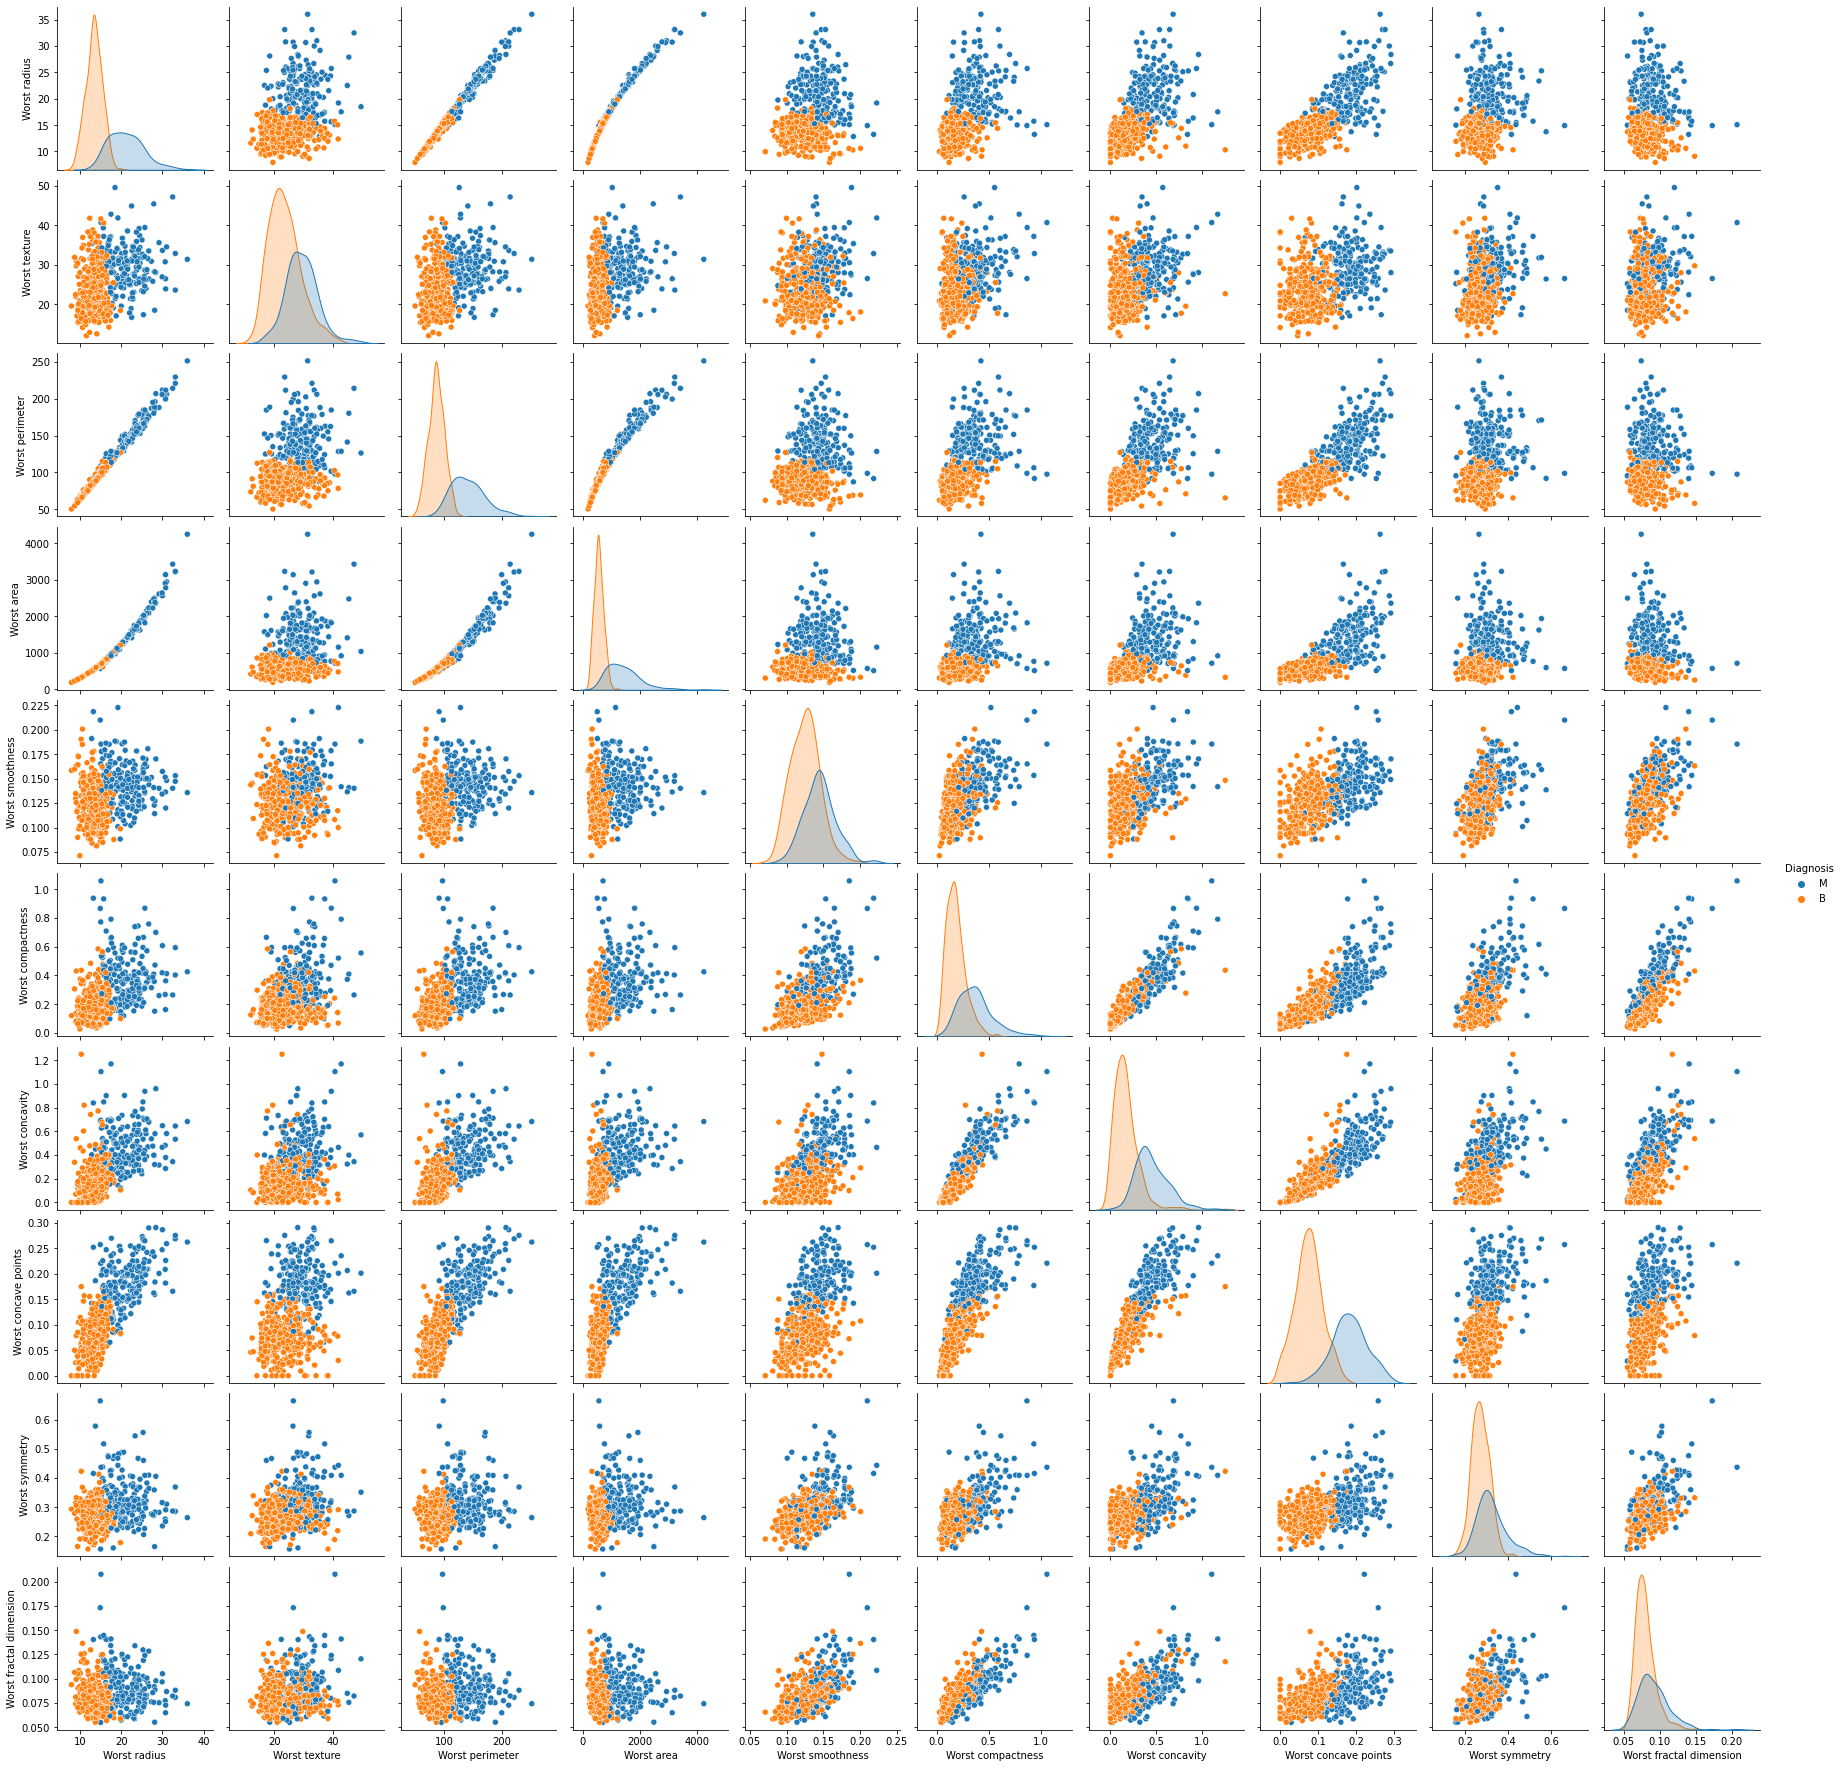

In [44]:
 plot_scatter(20)

### Comment
The worst features has also a similar distribution of the mean and SE. Almost the positively correlated features are the same.


# _________
## Correlation Matrix

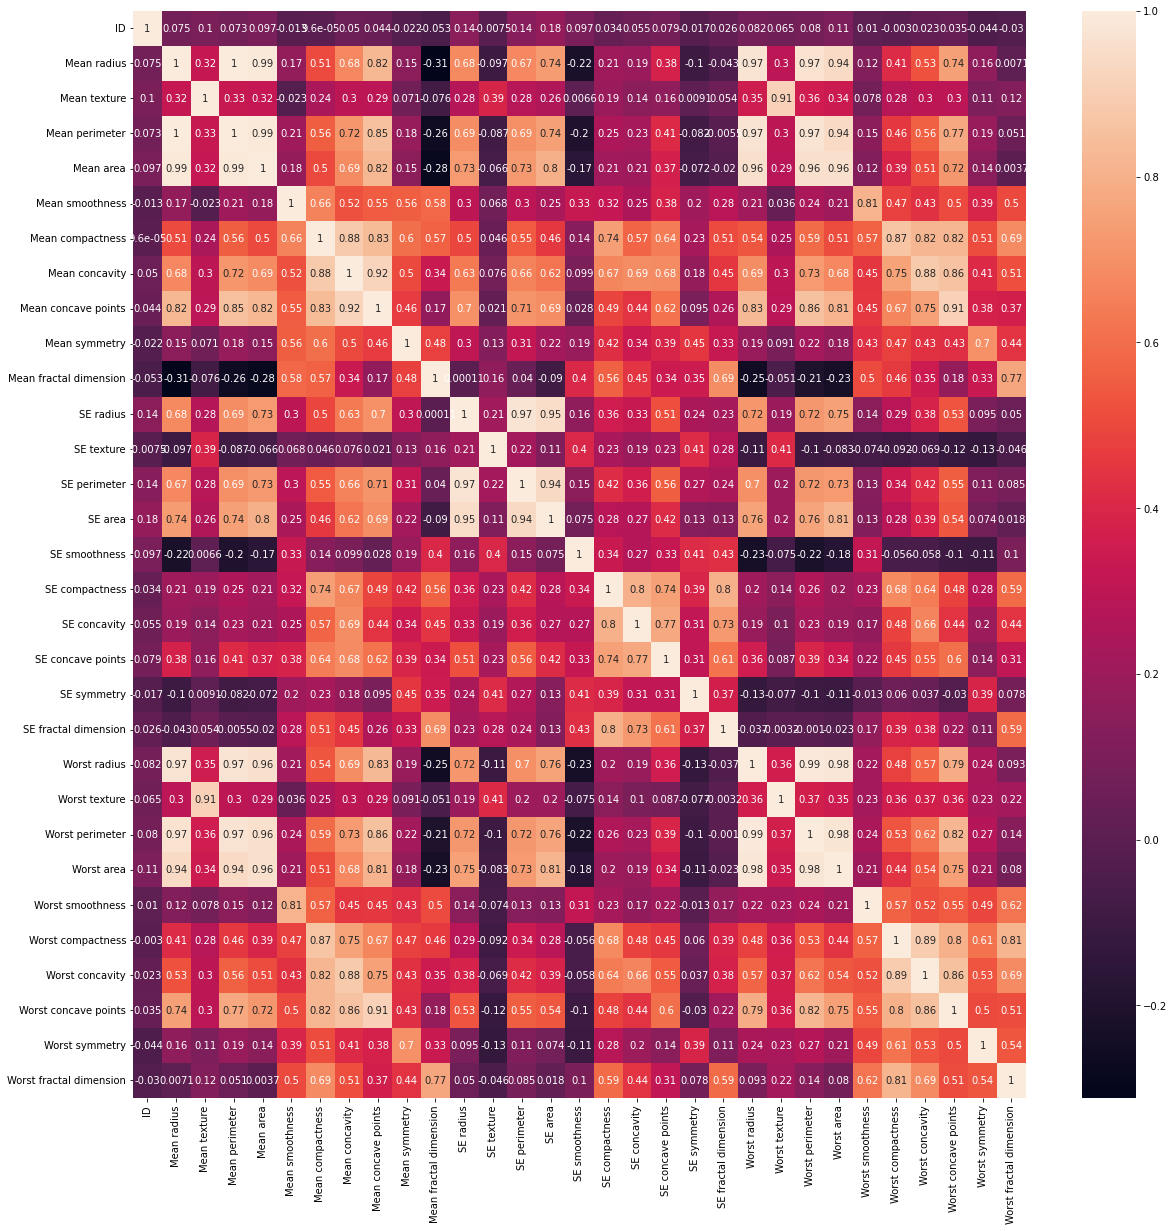

In [47]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True)
plt.show()

**The most highly correlated feature**
* Mean radius, Mean area **=** 0.99
* Mean perimeter, Mean area **=** 0.99
* Worst radius, Worst area **=** 0.98
* SE perimeter, SE radius **=** 0.97
* Worst radius, Mean radius **=** 0.97



**How to benefit from them** <br/>
We can use only one feature from each correlated pair and remove the other one. So this may increase the efficiency and holds only the necessary cost.